TensorFlow version: 2.12.0
Is GPU available: []
Found 69858 images belonging to 38 classes.


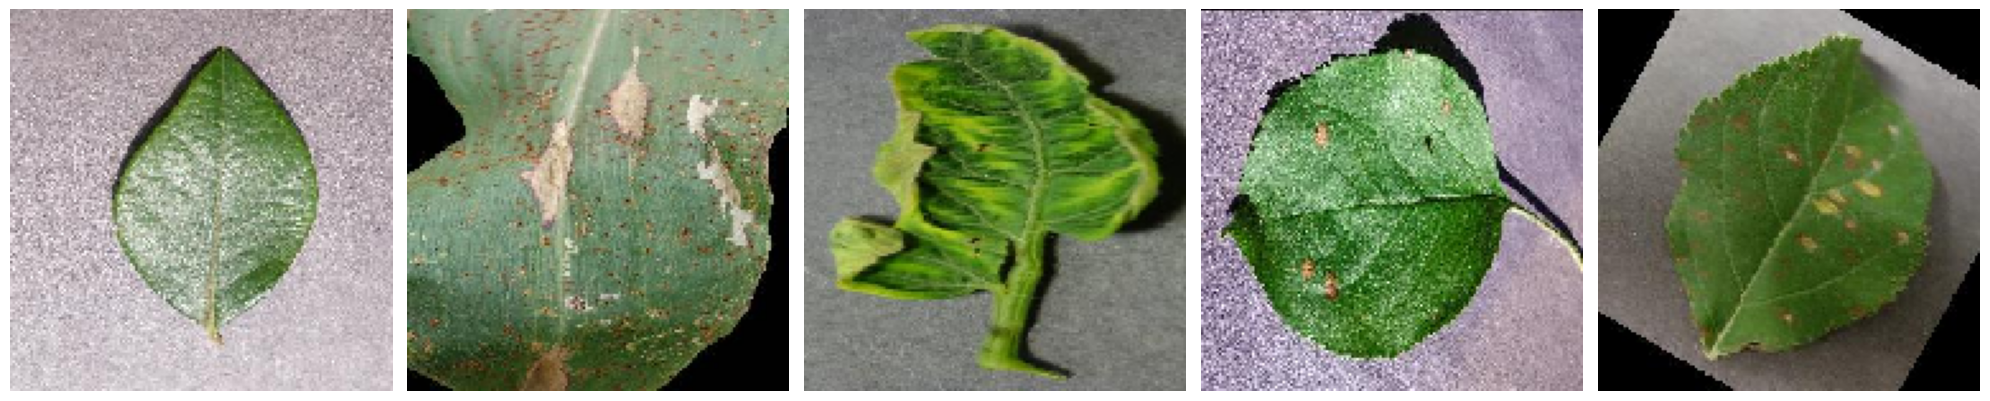

In [2]:
# Install necessary packages
!pip install tensorflow matplotlib scikit-learn plotly scikit-image

# Importing Necessary Libraries 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Check TensorFlow installation and GPU availability
print("TensorFlow version:", tf.__version__)
print("Is GPU available:", tf.config.list_physical_devices('GPU'))

# Define the path to your local dataset folder
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'

# Define the ImageDataGenerator to load images from subfolders
train_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directory using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,               # Target directory
    target_size=(150, 150),   # Resize all images to 150x150
    batch_size=32,            # Set batch size
    class_mode='categorical'  # Use categorical labels for multi-class classification
)

# Display the first batch of images
images, labels = next(train_generator)  # Get a batch of images and labels
fig, axes = plt.subplots(1, 5, figsize=(20, 20))  # Create a figure with subplots
axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis('off')  # Hide axis

plt.tight_layout()
plt.show()


In [3]:
import os
import matplotlib.pyplot as plt
import skimage.io as io
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [4]:
# Define the path to your local dataset folder
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'


In [5]:
# Define the ImageDataGenerator to load images from subfolders
train_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the directory using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_dir,               # Target directory
    target_size=(150, 150),   # Resize all images to 150x150
    batch_size=32,            # Set batch size
    class_mode='categorical',  # Use categorical labels for multi-class classification
    shuffle=True              # Shuffle the data
)


Found 69858 images belonging to 38 classes.


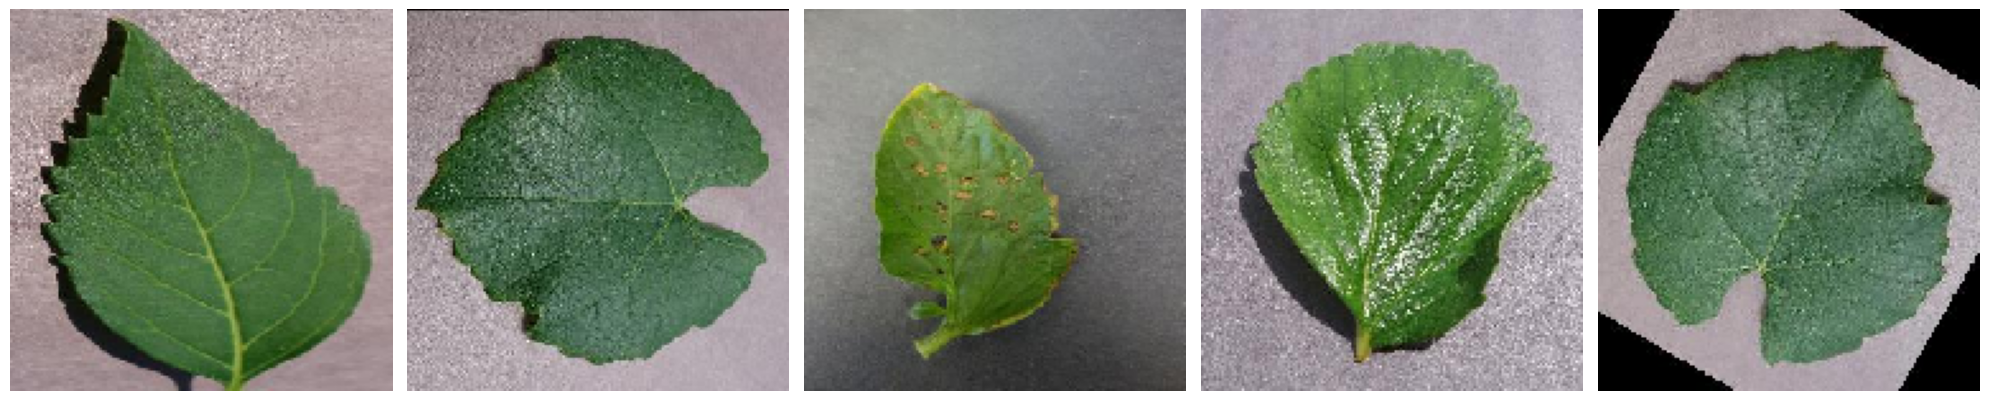

In [6]:
# Function to plot example images from the generator
def plot_examples(generator, num_images=5):
    images, labels = next(generator)  # Get a batch of images and labels
    fig, axes = plt.subplots(1, num_images, figsize=(20, 20))  # Create a figure with subplots
    axes = axes.flatten()
    
    for img, ax in zip(images, axes):
        ax.imshow(img)
        ax.axis('off')  # Hide axis
    plt.tight_layout()
    plt.show()

# Plot some example images from the dataset after loading
plot_examples(train_generator)


# Data Exploration and Visualisation

## Data Exploration

In [7]:
import os

# List all class directories in the training dataset
class_names = os.listdir(train_dir)
print("Class names:", class_names)


Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_

In [8]:
# Count images in each class directory
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names}
print("Number of images in each class:", class_counts)


Number of images in each class: {'Apple___Apple_scab': 2016, 'Apple___Black_rot': 1987, 'Apple___Cedar_apple_rust': 1760, 'Apple___healthy': 2008, 'Blueberry___healthy': 1816, 'Cherry_(including_sour)___healthy': 1826, 'Cherry_(including_sour)___Powdery_mildew': 1683, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 1205, 'Corn_(maize)___Common_rust_': 1907, 'Corn_(maize)___healthy': 1859, 'Corn_(maize)___Northern_Leaf_Blight': 1908, 'Grape___Black_rot': 1888, 'Grape___Esca_(Black_Measles)': 1920, 'Grape___healthy': 1692, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1722, 'Orange___Haunglongbing_(Citrus_greening)': 2010, 'Peach___Bacterial_spot': 1838, 'Peach___healthy': 1728, 'Pepper,_bell___Bacterial_spot': 1913, 'Pepper,_bell___healthy': 1988, 'Potato___Early_blight': 1939, 'Potato___healthy': 1824, 'Potato___Late_blight': 1939, 'Raspberry___healthy': 1781, 'Soybean___healthy': 2022, 'Squash___Powdery_mildew': 1736, 'Strawberry___healthy': 1824, 'Strawberry___Leaf_scorch': 177

In [9]:
from PIL import Image

# Load an example image to check its dimensions
sample_image_path = os.path.join(train_dir, class_names[0], os.listdir(os.path.join(train_dir, class_names[0]))[0])
with Image.open(sample_image_path) as img:
    print("Image size:", img.size)  # Output will be (width, height)
    print("Image format:", img.format)


Image size: (256, 256)
Image format: JPEG


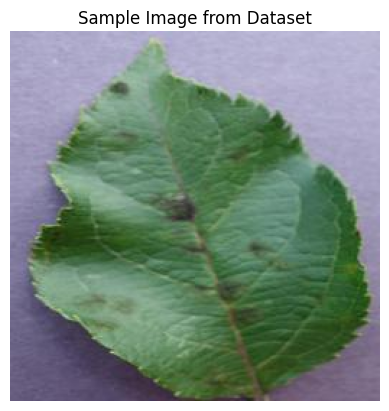

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sample_image = mpimg.imread(sample_image_path)
plt.imshow(sample_image)
plt.axis('off')
plt.title('Sample Image from Dataset')
plt.show()


## Data Visualisation

## Classes Distribution

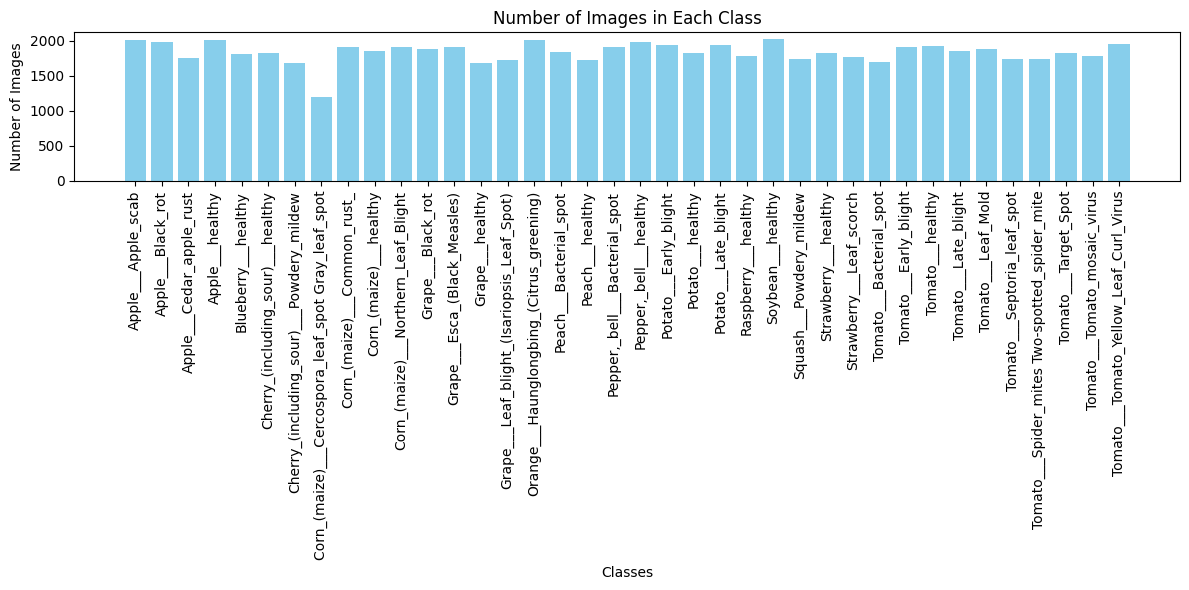

In [13]:
import os
import matplotlib.pyplot as plt

# Define the path to your local dataset folder
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'

# Get the list of classes (subdirectory names)
class_names = os.listdir(train_dir)

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):  # Check if it's a directory
        class_counts[class_name] = len(os.listdir(class_path))  # Count images

# Create a bar plot for the class distribution
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)  # Rotate class names for better visibility
plt.title('Number of Images in Each Class')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


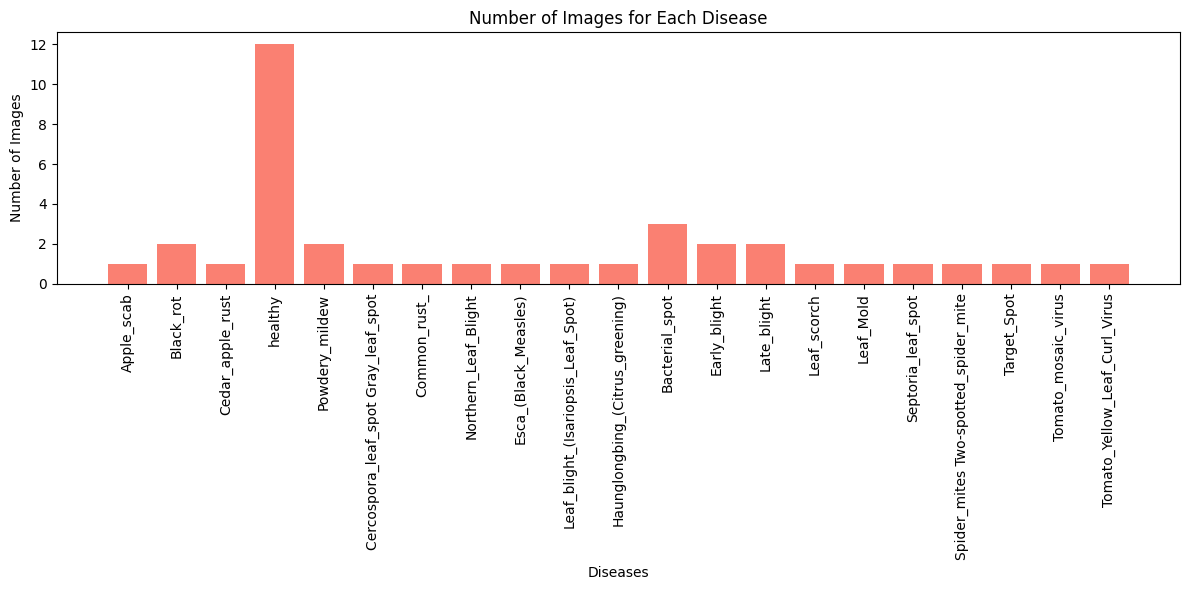

In [14]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Define the path to your local dataset folder
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'

# Get the list of classes (subdirectory names)
class_names = os.listdir(train_dir)

# Extract disease information
disease_names = [name.split('___')[1] for name in class_names if '___' in name]

# Count occurrences of each disease
disease_counts = Counter(disease_names)

# Create a bar plot for the disease distribution
plt.figure(figsize=(12, 6))
plt.bar(disease_counts.keys(), disease_counts.values(), color='salmon')
plt.xticks(rotation=90)  # Rotate disease names for better visibility
plt.title('Number of Images for Each Disease')
plt.xlabel('Diseases')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()


## Class Image Visualisation

# Image Segmentation

Multiple Histogram for different pixles intensity values

# Making Training Data

## Reading data from Keras Generators

In [22]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the path to your local dataset folder
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'

# Initialize the ImageDataGenerator
datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=180,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range=0.15,  # Randomly zoom image
        width_shift_range=0.15,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.15,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True)  # randomly flip images

# You can continue with the rest of your code...


In [16]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight

# Define the path to your local dataset folders
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'
valid_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\valid'

# Define the ImageDataGenerator for training and validation datasets
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load images from the training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=True  # Shuffle to help with balance
)

# Load images from the validation directory
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # No shuffling for validation
)

# Calculate class weights to balance the training process
class_labels = list(train_generator.class_indices.keys())  # Get class labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),  # Pass a NumPy array
    y=train_generator.classes
)

# Convert class weights to a dictionary for use in model training
class_weight_dict = dict(enumerate(class_weights))

# Now, you can use train_generator and valid_generator for model training
# Example: model.fit(train_generator, validation_data=valid_generator, class_weight=class_weight_dict, epochs=10)

# Optionally print class weights for verification
print("Class weights:", class_weight_dict)


Found 69858 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Class weights: {0: 0.9118890977443609, 1: 0.9251979975101317, 2: 1.0445275119617226, 3: 0.9155221220381632, 4: 1.012317412473916, 5: 1.092316352378272, 6: 1.0067735055052747, 7: 1.5256169469316445, 8: 0.9640107084701791, 9: 0.9635054617676266, 10: 0.9889017864726367, 11: 0.9737120874219447, 12: 0.9574835526315789, 13: 1.0675774802860811, 14: 1.0865061590145577, 15: 0.9146111547525531, 16: 1.0002004467098105, 17: 1.0638706140350878, 18: 0.960987151621867, 19: 0.9247326061632956, 20: 0.9481013001818626, 21: 0.9481013001818626, 22: 1.0078774238227146, 23: 1.032211353763409, 24: 0.909183195377167, 25: 1.0589679844773223, 26: 1.0362843410668723, 27: 1.0078774238227146, 28: 1.0801224565526626, 29: 0.9574835526315789, 30: 0.9931758082402116, 31: 0.9768163767548521, 32: 1.0535062584828834, 33: 1.055926720880317, 34: 1.0062224526834327, 35: 0.9374647736117449, 36: 1.0270214642752131, 37: 0.9545007378258731}


In [17]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the paths to your image directories
train_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'
valid_dir = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\valid'

# Create a list of image file paths and corresponding labels
image_paths = []
labels = []

# Iterate through the training directory and collect image paths and labels
for label in os.listdir(train_dir):
    class_dir = os.path.join(train_dir, label)
    if os.path.isdir(class_dir):  # Check if it's a directory
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image_paths.append(img_path)
            labels.append(label)

# Create a DataFrame from the collected image paths and labels
dataset = pd.DataFrame({
    'image_path': image_paths,
    'label': labels
})

# Split the dataset into training and validation sets
X_train, X_valid = train_test_split(dataset, test_size=0.05, stratify=dataset['label'], random_state=42)

# Optionally display the shapes of the resulting datasets
print(f"Training dataset size: {X_train.shape}")
print(f"Validation dataset size: {X_valid.shape}")


Training dataset size: (66365, 2)
Validation dataset size: (3493, 2)


## Making a Tensorflow Dataset

In [18]:
print(dataset.columns)


Index(['image_path', 'label'], dtype='object')


In [19]:
BATCH_SIZE = 8

# Define the path to your images
image_directory_train = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\train'
image_directory_valid = r'C:\Users\Soham Sarwadhikari\Desktop\Ayush project\valid'

# Assuming 'label' contains one-hot encoded values or categorical labels, ensure they match your requirements
train_generator = datagen.flow_from_dataframe(
    dataframe=dataset,
    directory=image_directory_train,
    x_col='image_path',
    y_col='label',  # Adjust this if labels are in different format
    target_size=(512, 512),
    class_mode='categorical',  # Use 'categorical' if your labels are one-hot encoded
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_generator = datagen.flow_from_dataframe(
    dataframe=X_valid,
    directory=image_directory_valid,
    x_col='image_path',
    y_col='label',  # Adjust this if labels are in different format
    target_size=(512, 512),
    class_mode='categorical',  # Use 'categorical' if your labels are one-hot encoded
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 69858 validated image filenames belonging to 38 classes.
Found 3493 validated image filenames belonging to 38 classes.


## Generator Images Visualisations

# Making The Models

## Xception Model

In [26]:
import tensorflow as tf

# Define the Xception model
xception_model = tf.keras.models.Sequential([
    tf.keras.applications.Xception(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')  # Adjust the output layer according to the number of classes
])

# Compile the model
xception_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
xception_model.summary()



Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 16, 16, 2048)      20861480  
                                                                 
 global_average_pooling2d_4   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 4)                 8196      
                                                                 
Total params: 20,869,676
Trainable params: 20,815,148
Non-trainable params: 54,528
_________________________________________________________________


## DenseNet121

In [25]:
import tensorflow as tf

# Define the DenseNet model
densenet_model = tf.keras.models.Sequential([
    tf.keras.applications.DenseNet121(include_top=False, weights='imagenet', input_shape=(512, 512, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(4, activation='softmax')  # Adjust the output layer according to the number of classes
])

# Compile the model
densenet_model.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

# Display the model summary
densenet_model.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 16, 16, 1024)      7037504   
                                                                 
 global_average_pooling2d_3   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 4)                 4100      
                                                                 
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


# Ensembling the Models

In [ ]:
pip install pydot


In [28]:
import tensorflow as tf

# Define the input layer
inputs = tf.keras.Input(shape=(512, 512, 3))

# Get outputs from the pre-trained models
xception_output = xception_model(inputs)
densenet_output = densenet_model(inputs)

# Combine the outputs using average pooling
outputs = tf.keras.layers.average([densenet_output, xception_output])

# Create the final model
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()




Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 512, 512, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_3 (Sequential)      (None, 4)            7041604     ['input_9[0][0]']                
                                                                                                  
 sequential_4 (Sequential)      (None, 4)            20869676    ['input_9[0][0]']                
                                                                                                  
 average_1 (Average)            (None, 4)            0           ['sequential_3[1][0]',     

## Setting the hyperparameters & Callbacks

In [37]:
x_batch, y_batch = train_generator.next()  # Get a batch of data
print("Batch shape:", x_batch.shape)  # Should be (BATCH_SIZE, IMG_HEIGHT, IMG_WIDTH, 3)
print("Label shape:", y_batch.shape)  # Should be (BATCH_SIZE, 4)


Batch shape: (32, 150, 150, 3)
Label shape: (32, 38)


In [38]:
print("Training classes:", train_generator.class_indices)
print("Validation classes:", valid_generator.class_indices)


Training classes: {'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_bl

Found 69858 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/10
2184/2184 [==============================] - ETA: 0s - loss: 3.5128 - accuracy: 0.1024
Epoch 1: val_accuracy improved from -inf to 0.16612, saving model to model.h5
2184/2184 [==============================] - 438s 200ms/step - loss: 3.5128 - accuracy: 0.1024 - val_loss: 3.0075 - val_accuracy: 0.1661 - lr: 0.0010
Epoch 2/10
2184/2184 [==============================] - ETA: 0s - loss: 2.7351 - accuracy: 0.2132
Epoch 2: val_accuracy improved from 0.16612 to 0.28193, saving model to model.h5
2184/2184 [==============================] - 356s 163ms/step - loss: 2.7351 - accuracy: 0.2132 - val_loss: 2.4072 - val_accuracy: 0.2819 - lr: 0.0010
Epoch 3/10
2184/2184 [==============================] - ETA: 0s - loss: 2.2386 - accuracy: 0.3264
Epoch 3: val_accuracy improved from 0.28193 to 0.34976, saving model to model.h5
2184/2184 [==============================] - 335s 153ms/step - loss: 2.2386 - 

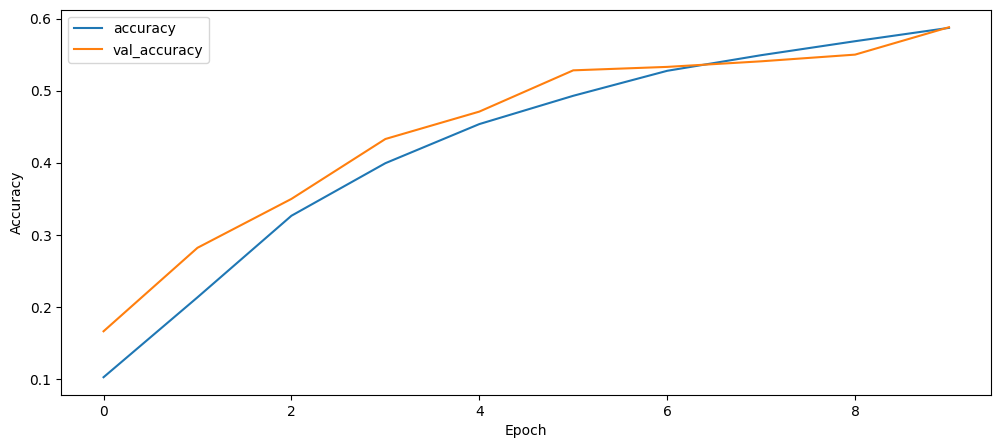

In [39]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
import matplotlib.pyplot as plt

# Set parameters
EPOCHS = 10  # Reduced number of epochs for initial training
BATCH_SIZE = 32
IMG_HEIGHT, IMG_WIDTH = 150, 150  # Set your image dimensions

# Define paths
train_data_dir = 'C:\\Users\\Soham Sarwadhikari\\Desktop\\Ayush project\\train'  # Update with your training data path
valid_data_dir = 'C:\\Users\\Soham Sarwadhikari\\Desktop\\Ayush project\\valid'

# Data generators
train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'  # Use 'categorical' for one-hot encoded labels
)

# Build model
model = Sequential([
    Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(38, activation='softmax')  # Update this to match the number of classes in your dataset
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
lr_callback = LearningRateScheduler(lambda epoch: 1e-3 * 0.1**(epoch // 10))
model_checkpoint = ModelCheckpoint('model.h5', monitor='val_accuracy', verbose=2, save_best_only=True)

# Fit the model
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS,  # Reduced epochs
    callbacks=[lr_callback, model_checkpoint]
)

# Optionally, plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Training the Model

In [ ]:
# Model training using the fit method
model_history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[model_checkpoint, lr_callback]
)


Epoch 1/10
2184/2184 [==============================] - ETA: 0s - loss: 1.2849 - accuracy: 0.6052
Epoch 1: val_accuracy did not improve from 0.58792
2184/2184 [==============================] - 324s 148ms/step - loss: 1.2849 - accuracy: 0.6052 - val_loss: 1.4207 - val_accuracy: 0.5792 - lr: 0.0010
Epoch 2/10
2184/2184 [==============================] - ETA: 0s - loss: 1.2471 - accuracy: 0.6157
Epoch 2: val_accuracy did not improve from 0.58792
2184/2184 [==============================] - 323s 148ms/step - loss: 1.2471 - accuracy: 0.6157 - val_loss: 1.4029 - val_accuracy: 0.5615 - lr: 0.0010
Epoch 3/10
1578/2184 [====================>.........] - ETA: 1:24 - loss: 1.2079 - accuracy: 0.6278

### Saving History

In [ ]:
# Saving model history
pd.DataFrame(model_history.history).to_csv('ModelHistory.csv')

### Model History Visualisation

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['accuracy'])
plt.title("accuracy Plot")

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['loss'])
plt.title("Loss Plot")

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['val_accuracy'])
plt.title("Validation Accuracy Plot")

In [ ]:
plt.plot(pd.DataFrame(model_history.history)['val_loss'])
plt.title("Validation Accuracy Plot")

# Predicting Classes

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Reading testing and submission data
test_dataset = pd.read_csv('C:\\Users\\Soham Sarwadhikari\\Desktop\\Ayush project\\test.csv')
submission = pd.read_csv('C:\\Users\\Soham Sarwadhikari\\Desktop\\Ayush project\\sample_submission.csv')

# Adding .jpg extension to image_id
test_dataset['image_id'] = test_dataset['image_id'] + '.jpg'

# Create an ImageDataGenerator for test data (normalization)
datagen = ImageDataGenerator(rescale=1.0 / 255)

# Creating test data generator
test_gen = datagen.flow_from_dataframe(
    test_dataset,
    directory='C:\\Users\\Soham Sarwadhikari\\Desktop\\Ayush project\\images\\',
    x_col='image_id',
    target_size=(IMG_HEIGHT, IMG_WIDTH),  # Use the same IMG_HEIGHT and IMG_WIDTH as before
    class_mode=None,
    shuffle=False,
    batch_size=8
)

# Predicting classes
predictions = model.predict(test_gen)  # Use model.predict() instead of model.predict_generator()

# Assuming you have four classes
submission['Apple___Apple_scab'] = predictions[:, 0]
submission['Apple___Black_rot'] = predictions[:, 1]
submission['Apple___Cedar_apple_rust'] = predictions[:, 2]
submission['Apple___healthy'] = predictions[:, 3]
# Add additional columns for any other classes you have based on your actual setup

# Save submission file
submission.to_csv('submission.csv', index=False)

# Display submission dataframe (optional)
print(submission)


In [ ]:
# Predicting class
predictions = model.predict_generator(test_gen)

In [ ]:
submission['healthy'] = predictions[:, 0]
submission['multiple_diseases'] = predictions[:, 1]
submission['rust'] = predictions[:, 2]
submission['scab'] = predictions[:, 3]